In [1]:
import numpy as np
from scipy.sparse import csr_matrix, find
from scipy.spatial import cKDTree
from tqdm import tqdm_notebook as tqdm

from datasets.graph import draw_sample
import torch
import torch_geometric
import torch
import os
import os.path as osp


In [2]:
import glob
raw_dir= '/home/sameasy2006/npz_hgcal_pionaddsiminfo_k8/pion_hgctup_0to1000/clusters/'
fnamelist = [filepath for filepath in glob.glob(raw_dir+'data_*.pt')]
data_list = []
for i in tqdm(fnamelist):
    data_list.append(torch.load(i))
    
print((data_list[0].y))
print(data_list[0].pos)
print(len(data_list))
totalev = len(data_list)
#trainev = 

/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



tensor([452.0298])
None
809


In [3]:
import torch_geometric
ntrainbatch = 1
ntestbatch = 1
trainloader = torch_geometric.data.DataLoader(data_list[:totalev-200], batch_size=ntrainbatch)
testloader = torch_geometric.data.DataLoader(data_list[totalev-200:totalev], batch_size=ntestbatch)

In [4]:
'''
import os.path as osp

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch_geometric.transforms as T
from torch_geometric.data import DataLoader
from tqdm import tqdm_notebook as tqdm


from models.DynamicReductionNetwork import DynamicReductionNetwork

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.drn = DynamicReductionNetwork()
        
    def forward(self, data):
        logits = self.drn(data)
#        return F.softmax(logits)
        return logits
device = torch.device('cpu')#('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)


#model.train()

for data in (loader):
        model.train()
        data = data.to(device)        
#        print (data.batch)
#        print (model(data))
#        print (data.y)
#        optimizer.zero_grad()

#        print(data.x)
        result = model(data)
        print(result)
#        mse = F.mse_loss(result, data.y, reduction='mean')


#        mse.backward()
#        print(mse)
#        optimizer.step
        break
        
'''

"\nimport os.path as osp\n\nimport torch\nimport torch.nn as nn\nimport torch.nn.functional as F\n\nimport torch_geometric.transforms as T\nfrom torch_geometric.data import DataLoader\nfrom tqdm import tqdm_notebook as tqdm\n\n\nfrom models.DynamicReductionNetwork import DynamicReductionNetwork\n\nclass Net(nn.Module):\n    def __init__(self):\n        super(Net, self).__init__()\n        self.drn = DynamicReductionNetwork()\n        \n    def forward(self, data):\n        logits = self.drn(data)\n#        return F.softmax(logits)\n        return logits\ndevice = torch.device('cpu')#('cuda' if torch.cuda.is_available() else 'cpu')\nmodel = Net().to(device)\noptimizer = torch.optim.AdamW(model.parameters(), lr=0.001)\n\n\n#model.train()\n\nfor data in (loader):\n        model.train()\n        data = data.to(device)        \n#        print (data.batch)\n#        print (model(data))\n#        print (data.y)\n#        optimizer.zero_grad()\n\n#        print(data.x)\n        result = model(

In [5]:
import os.path as osp

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch_geometric.transforms as T
from torch_geometric.data import DataLoader
from tqdm import tqdm_notebook as tqdm


from models.DynamicReductionNetwork import DynamicReductionNetwork

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.drn = DynamicReductionNetwork()
        
    def forward(self, data):
        logits = self.drn(data)
        return F.softplus(logits)
        #return logits
device = torch.device('cuda')#('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
#criterion = torch.nn.MSELoss()

model.train()
def train(epoch):
    model.train()
    loss = []
    for data in tqdm(trainloader):
            data = data.to(device)        
            optimizer.zero_grad()
            result = model(data)
            mse = F.mse_loss(result, data.y, reduction='mean')
#            mse = criterion(result, data.y)
#            print('result, y:',result,data.y)
#            print('crit, orig:',criterion(result, data.y),F.mse_loss(result, data.y, reduction='mean'))
            loss.append(mse.item()) 
            mse.backward()
#            print(mse)
            optimizer.step()
    print( 'batches for train:',len(loss)) 
#    print('loss',loss)
    print('train loss:',np.mean(np.array(loss))) 
#    print(data)

from scipy.stats import norm
import matplotlib.mlab as mlab
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline

def evaluate(epoch):
        """"Evaluate the model"""
        model.zero_grad()
        torch.cuda.empty_cache()
        model.eval()
        loss = []
        frac = []
        for data in tqdm(testloader):
            data = data.to(device)        
            result = model(data)
            mse = F.mse_loss(result, data.y, reduction='mean')
#            print (result.item(),data.y.item())
            frac.append((result.item() - data.y.item())/data.y.item())
            loss.append(mse.item()) 
        
        print('batches for test:', len(loss)) 
        print('test loss:',np.mean(np.array(loss)))
        fracarr = np.array(frac)
        print('pred - true / true mean:',(np.mean(fracarr)))
        print('pred - true / true std:',(np.std(fracarr)))
        (mu, sigma) = norm.fit(fracarr)
        print('mu,sig:',mu,sigma)
        
        
        n, bins, patches = plt.hist(fracarr, 60, normed=1, facecolor='green', alpha=0.75)
        y = scs.norm.pdf( bins, mu, sigma)
        l = plt.plot(bins, y, 'r--', linewidth=2)

        #plot
        plt.xlabel('pred - true / true')
        plt.ylabel('counts')
        plt.title(r'$\mathrm{pred - true / true:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
        plt.grid(True)

        plt.show()
        

epoch: 1


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 104700.62396226058


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 86713.2759038803
pred - true / true mean: 1.9554035275605965
pred - true / true std: 6.22109153426089
mu,sig: 1.9554035275605965 6.22109153426089


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


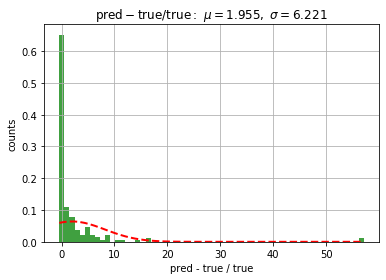

epoch: 2


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 76473.0247648878


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 34002.59232457191
pred - true / true mean: 0.5629844945556441
pred - true / true std: 2.0734415038920844
mu,sig: 0.5629844945556441 2.0734415038920844


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


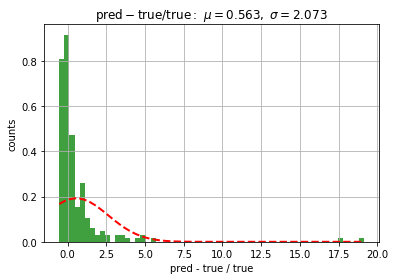

epoch: 3


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 29501.535074600884


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 13914.139762060046
pred - true / true mean: -0.12994874396856546
pred - true / true std: 0.3598367411249928
mu,sig: -0.12994874396856546 0.3598367411249928


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


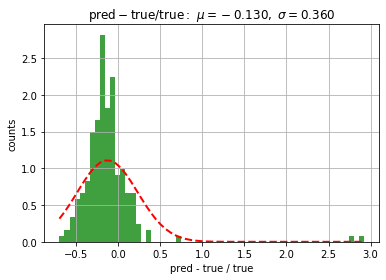

epoch: 4


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 14992.978828654861


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 11043.254673329293
pred - true / true mean: -0.09181060566814267
pred - true / true std: 0.3366447851013254
mu,sig: -0.09181060566814267 0.3366447851013254


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


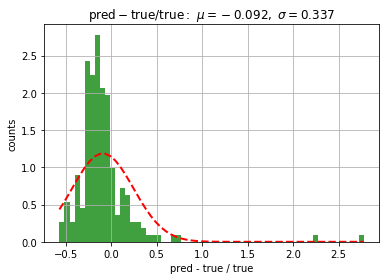

epoch: 5


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 12922.207343470434


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 12689.631966640427
pred - true / true mean: -0.13298151296529231
pred - true / true std: 0.2936190580440479
mu,sig: -0.13298151296529231 0.2936190580440479


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


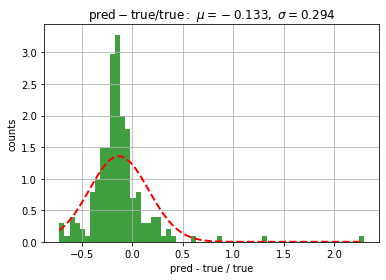

epoch: 6


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 12828.479779951433


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 13189.266708185374
pred - true / true mean: -0.1371244861977551
pred - true / true std: 0.2804220094439736
mu,sig: -0.1371244861977551 0.2804220094439736


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


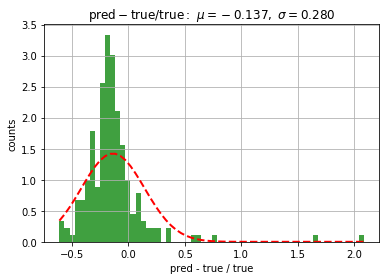

epoch: 7


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 12432.413118035018


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 14439.54742857635
pred - true / true mean: -0.18772890478075063
pred - true / true std: 0.22861768587091716
mu,sig: -0.18772890478075063 0.22861768587091716


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


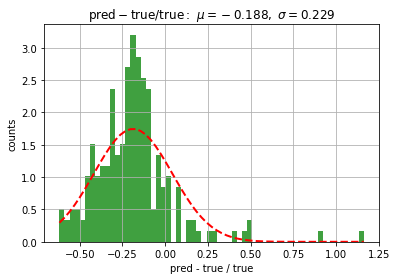

epoch: 8


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 13143.407270426233


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 15608.482849074602
pred - true / true mean: -0.19034242722518335
pred - true / true std: 0.20925760409905386
mu,sig: -0.19034242722518335 0.20925760409905386


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


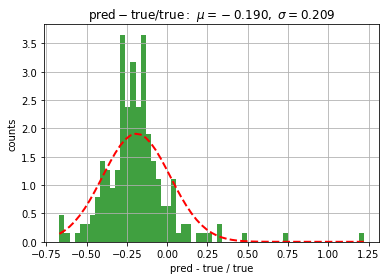

epoch: 9


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 12150.250899975144


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 10215.810077530714
pred - true / true mean: -0.12414097005946065
pred - true / true std: 0.255206437836364
mu,sig: -0.12414097005946065 0.255206437836364


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


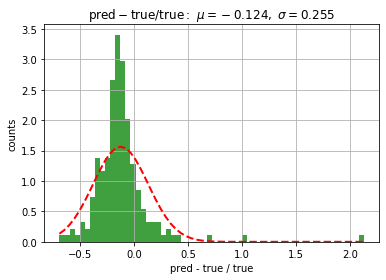

epoch: 10


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 13107.479713226236


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 7257.569849498458
pred - true / true mean: 0.10563285818494383
pred - true / true std: 0.5097006841743505
mu,sig: 0.10563285818494383 0.5097006841743505


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


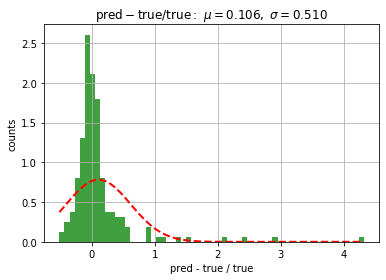

epoch: 11


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 14446.61739300502


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 7408.809978359937
pred - true / true mean: -0.11197498308498963
pred - true / true std: 0.24558889305329487
mu,sig: -0.11197498308498963 0.24558889305329487


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


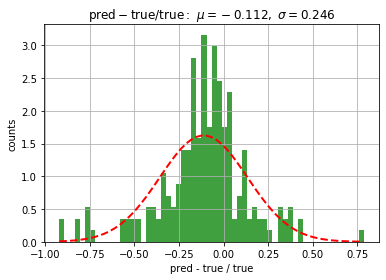

epoch: 12


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 13284.818543194086


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 7572.917267523427
pred - true / true mean: 0.05351679852667426
pred - true / true std: 0.2651474834561362
mu,sig: 0.05351679852667426 0.2651474834561362


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


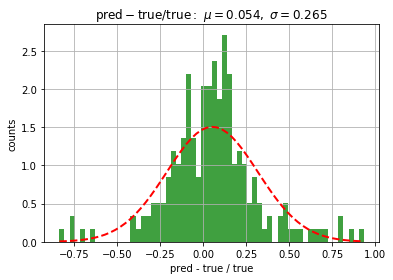

epoch: 13


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 13239.65763965263


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 6361.178722728305
pred - true / true mean: 0.11460380792071351
pred - true / true std: 0.31474396746302424
mu,sig: 0.11460380792071351 0.31474396746302424


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


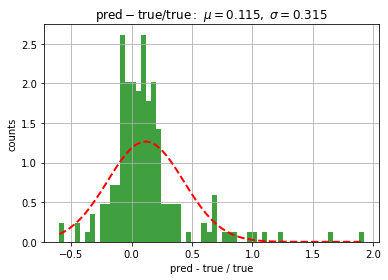

epoch: 14


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 11877.70526753339


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 5448.011163068488
pred - true / true mean: 0.006293404070504589
pred - true / true std: 0.24028446497512812
mu,sig: 0.006293404070504589 0.24028446497512812


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


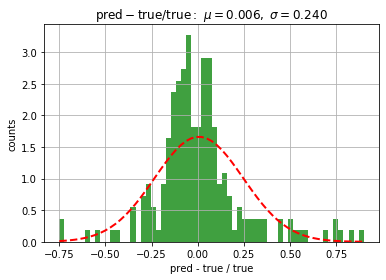

epoch: 15


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 10422.741335628369


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 6082.74793098472
pred - true / true mean: 0.12446209252378747
pred - true / true std: 0.3029715337577983
mu,sig: 0.12446209252378747 0.3029715337577983


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


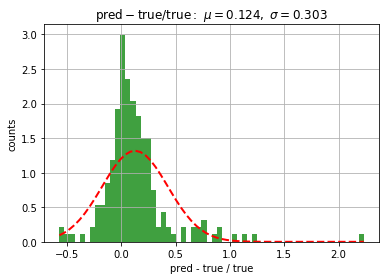

epoch: 16


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 10665.163844362174


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 5069.08027682025
pred - true / true mean: 0.042309936293947706
pred - true / true std: 0.24202974112197256
mu,sig: 0.042309936293947706 0.24202974112197256


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


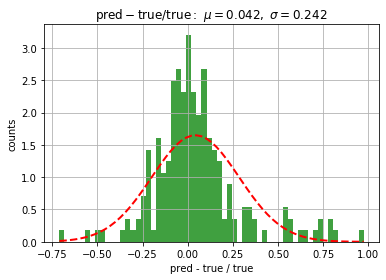

epoch: 17


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 11309.553585140411


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 6679.621558617353
pred - true / true mean: 0.06912424173003133
pred - true / true std: 0.2560663543268411
mu,sig: 0.06912424173003133 0.2560663543268411


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


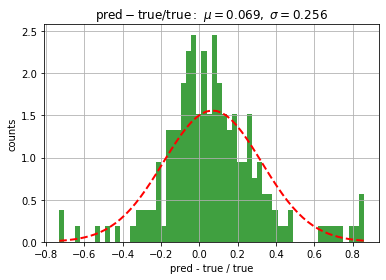

epoch: 18


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 9725.553022897144


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 4929.925924638752
pred - true / true mean: 0.06613142692377236
pred - true / true std: 0.2816096741465853
mu,sig: 0.06613142692377236 0.2816096741465853


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


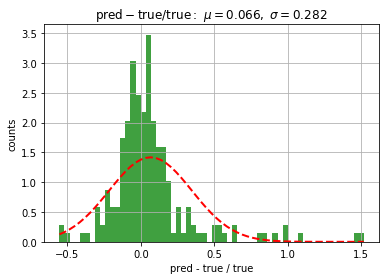

epoch: 19


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 9646.2651761437


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 5002.075659173131
pred - true / true mean: 0.03966649428806509
pred - true / true std: 0.25464571330459573
mu,sig: 0.03966649428806509 0.25464571330459573


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


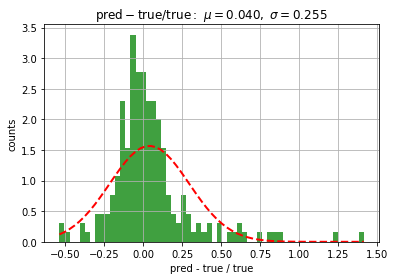

epoch: 20


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for train: 609
train loss: 9793.45494419624


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



batches for test: 200
test loss: 4301.752290152656
pred - true / true mean: 0.04058265073877104
pred - true / true std: 0.23837520491098466
mu,sig: 0.04058265073877104 0.23837520491098466


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


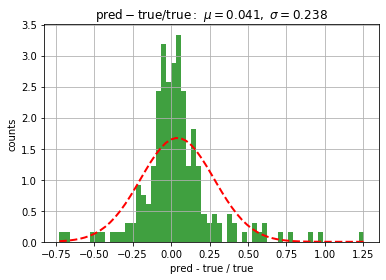

epoch: 21


/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


KeyboardInterrupt: 

In [6]:
for epoch in range(1, 60):
    print ('epoch:',epoch)
    train(epoch)
    evaluate(epoch)

In [ ]:

for data in tqdm(loader):
    model.eval()
    data = data.to('cuda')
    result=model(data)
    print(data.y)
    print(result)
    break

In [ ]:
print(data_list[0].y)

#    cl = data_list[0].to('cuda')
#    cl.batch = torch.zeros(cl.x.shape[0], dtype=torch.int64).to('cuda:0')
#    val = model(cl)
#    print(val)
    #test(cl, batch).backward()
    #print(val)

In [9]:
simentest= []
for i,data in tqdm(enumerate(testloader)):
    simentest.append(data.y.item())
    

/home/sameasy2006/miniconda3/envs/mlgnn2/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


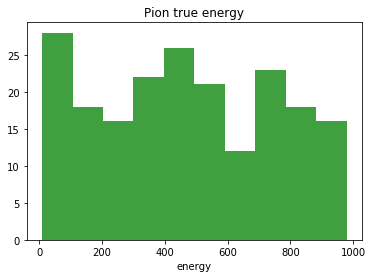

In [12]:
plt.hist(simentest, facecolor='green', alpha=0.75)
plt.xlabel('energy')
plt.title('Pion true energy')
plt.show()

In [ ]:
torch.save(model.state_dict(), PATH)